In [ ]:
import mailbox  # Read the mbox file
import pandas as pd
import re  # Pattern matching, used to extract names and email addresses from the sender field
from datetime import datetime

# Function to parse the MBOX file and extract details
def parse_mbox_with_date_components(file_path):
    # Open the MBOX file
    mbox = mailbox.mbox(file_path)

    # Lists to store email data
    dates = []
    senders = []
    subjects = []
    names = []
    emails = []
    days = []
    months = []
    years = []
    weekdays = []
    times = []
    hours = []
    minutes = []
    seconds = []

    # Function to extract name and email from the sender field
    def extract_name_and_email(sender):
        name_pattern = r"\"?([^\"]+)\"?"  # Matches text within quotes or plain names
        email_pattern = r"<(.+?)>"  # Matches text within angle brackets

        name_match = re.search(name_pattern, sender)
        name = name_match.group(1) if name_match else "Unknown"

        email_match = re.search(email_pattern, sender)
        email = email_match.group(1) if email_match else "Unknown"

        return name, email

    # Function to parse date and extract components, including time
    def parse_date(date_str):
        try:
            # Parse the date string
            parsed_date = datetime.strptime(date_str[:31].strip(), "%a, %d %b %Y %H:%M:%S %z")
            day = parsed_date.day
            month = parsed_date.strftime("%B")  # Full month name
            year = parsed_date.year
            weekday = parsed_date.strftime("%A")  # Full weekday name
            time = parsed_date.strftime("%H:%M:%S")  # Time as HH:MM:SS
            hour = parsed_date.hour
            minute = parsed_date.minute
            second = parsed_date.second
        except Exception:
            # Handle cases where the date string is invalid
            day, month, year, weekday = None, None, None, "Unknown"
            time, hour, minute, second = None, None, None, None
        return day, month, year, weekday, time, hour, minute, second

    # Loop through each email in the MBOX file
    for message in mbox:
        # Extract and store the date, sender, and subject
        date = message.get('Date', 'Unknown')
        dates.append(date)
        sender = message.get('From', 'Unknown')
        senders.append(sender)
        subjects.append(message.get('Subject', 'Unknown'))

        # Extract name and email from the sender field
        name, email = extract_name_and_email(sender)
        names.append(name)
        emails.append(email)

        # Parse date to extract day, month, year, weekday, and time components
        day, month, year, weekday, time, hour, minute, second = parse_date(date)
        days.append(day)
        months.append(month)
        years.append(year)
        weekdays.append(weekday)
        times.append(time)
        hours.append(hour)
        minutes.append(minute)
        seconds.append(second)

    # Create a DataFrame to organize the extracted data
    data = pd.DataFrame({
        'Date': dates,
        'Sender': senders,
        'Name': names,
        'Email': emails,
        'Subject': subjects,
        'Day': days,
        'Month': months,
        'Year': years,
        'Weekday': weekdays,
        'Time': times,
        'Hour': hours,
        'Minute': minutes,
        'Second': seconds
    })

    return data

# File path to the MBOX file (in the same directory)
mbox_file_path = "..\Datasets\All mail Including Spam and Trash.mbox"

# Parse the MBOX file
email_data = parse_mbox_with_date_components(mbox_file_path)

# Save the extracted data to a CSV file in the same directory
output_csv_path = "..\Datasets\parsed_email_data.csv"
email_data.to_csv(output_csv_path, index=False)

# Notify the user
print(f"Data saved to {output_csv_path}")


Data saved to ..\Datasets\parsed_email_data.csv


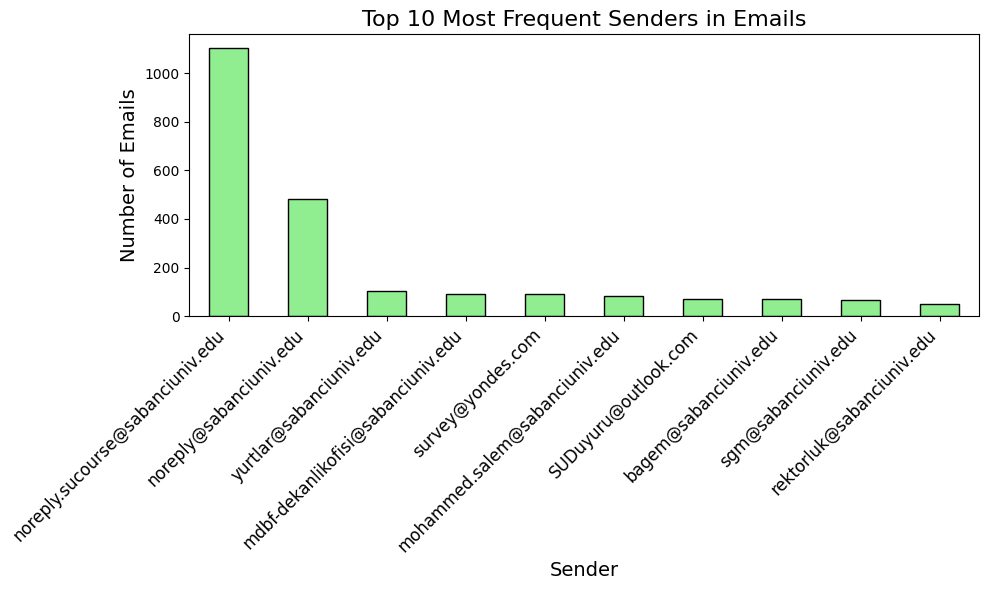

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load the parsed email data
file_path = "..\Datasets\parsed_email_data.csv"
email_data = pd.read_csv(file_path)

# Function to extract email from the sender field
def extract_email(sender):
    email_pattern = r"<(.+?)>"
    email_match = re.search(email_pattern, sender)
    return email_match.group(1) if email_match else sender

# Apply the function to the 'Sender' column
email_data['Sender'] = email_data['Sender'].apply(extract_email)

# Count the number of emails per sender
top_senders = email_data['Sender'].value_counts().head(10)  # Top 10 senders

# Plot the bar chart
plt.figure(figsize=(10, 6))
top_senders.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Top 10 Most Frequent Senders in Emails', fontsize=16)
plt.xlabel('Sender', fontsize=14)
plt.ylabel('Number of Emails', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


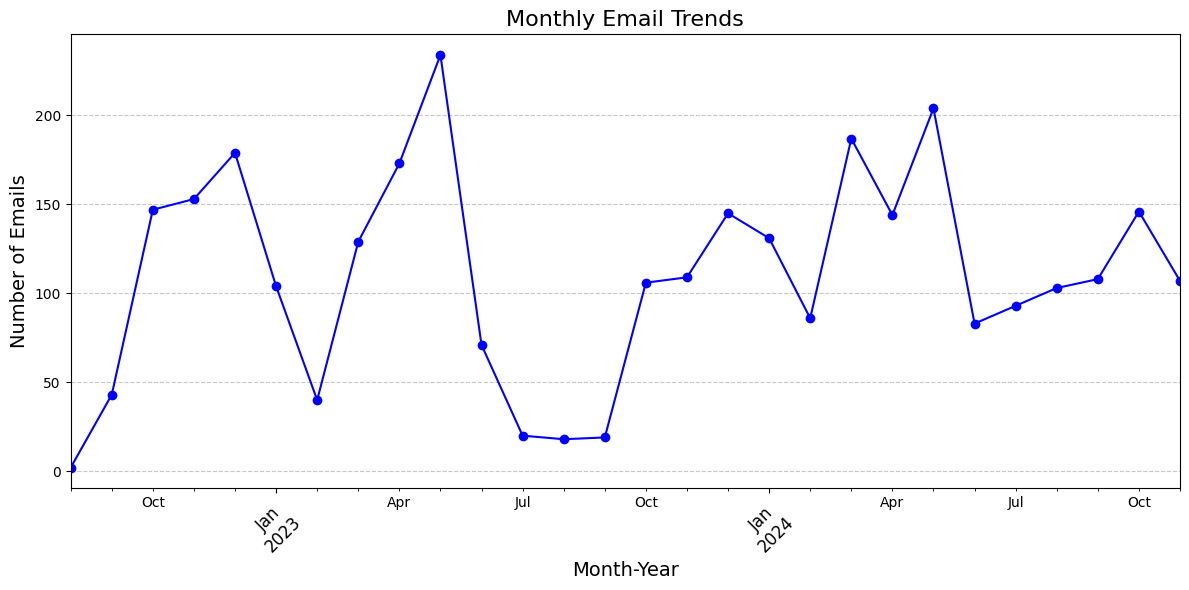

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the parsed email data
file_path = "..\Datasets\parsed_email_data.csv"
email_data = pd.read_csv(file_path)

# Ensure 'Month', 'Day', and 'Year' columns are available (or replace with your column names)
if {'Month', 'Day', 'Year'}.issubset(email_data.columns):
    # Map month names to numeric values
    month_mapping = {
        'January': 1, 'February': 2, 'March': 3, 'April': 4,
        'May': 5, 'June': 6, 'July': 7, 'August': 8,
        'September': 9, 'October': 10, 'November': 11, 'December': 12
    }
    email_data['Month'] = email_data['Month'].map(month_mapping)

    # Create a 'Date' column from 'Year', 'Month', and 'Day'
    email_data['Date'] = pd.to_datetime(email_data[['Year', 'Month', 'Day']])

    # Extract the month and year
    email_data['Month-Year'] = email_data['Date'].dt.to_period('M')

    # Count the number of emails per month
    monthly_trends = email_data['Month-Year'].value_counts().sort_index()

    # Plot the line chart
    plt.figure(figsize=(12, 6))
    monthly_trends.plot(kind='line', marker='o', color='blue')
    plt.title('Monthly Email Trends', fontsize=16)
    plt.xlabel('Month-Year', fontsize=14)
    plt.ylabel('Number of Emails', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Show the plot
    plt.show()
else:
    print("Error: The dataset does not contain 'Month', 'Day', and 'Year' columns.")


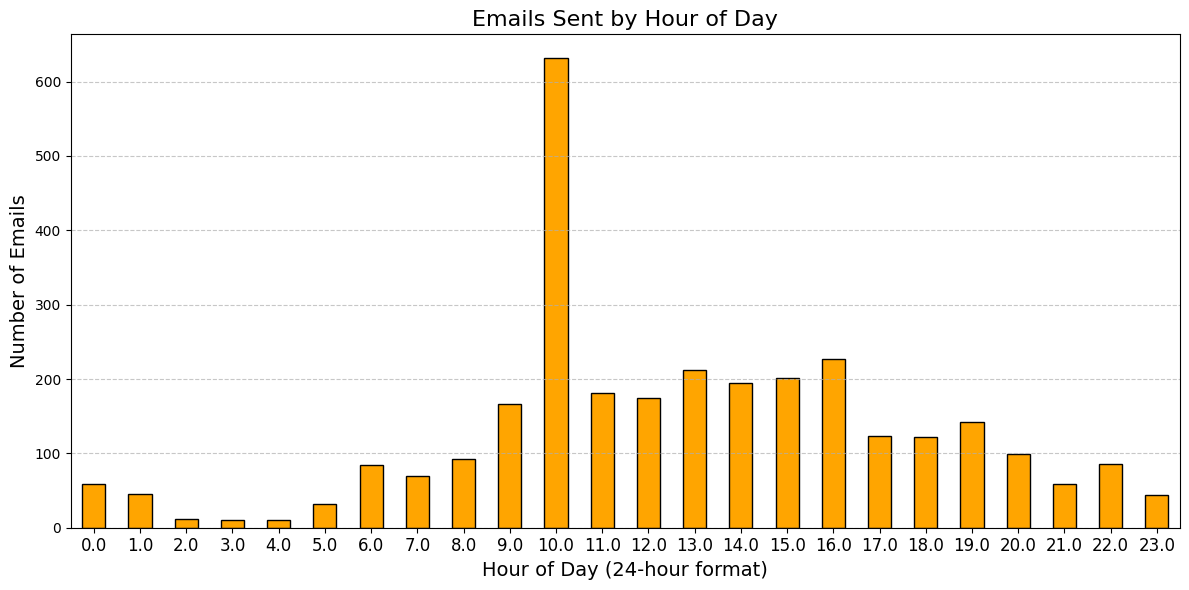

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the parsed email data
file_path = "..\Datasets\parsed_email_data.csv"  
email_data = pd.read_csv(file_path)

# Ensure the 'Hour' column is present and clean
if 'Hour' not in email_data.columns:
    print("The 'Hour' column is missing. Ensure you have parsed time data correctly.")
else:
    # Count the number of emails sent during each hour
    hourly_trends = email_data['Hour'].value_counts().sort_index()

    # Plot the bar chart
    plt.figure(figsize=(12, 6))
    hourly_trends.plot(kind='bar', color='orange', edgecolor='black')
    plt.title('Emails Sent by Hour of Day', fontsize=16)
    plt.xlabel('Hour of Day (24-hour format)', fontsize=14)
    plt.ylabel('Number of Emails', fontsize=14)
    plt.xticks(rotation=0, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Show the plot
    plt.show()


C:\Users\salem\AppData\Local\Temp\ipykernel_27820\3419409444.py:16: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = email_data.pivot_table(


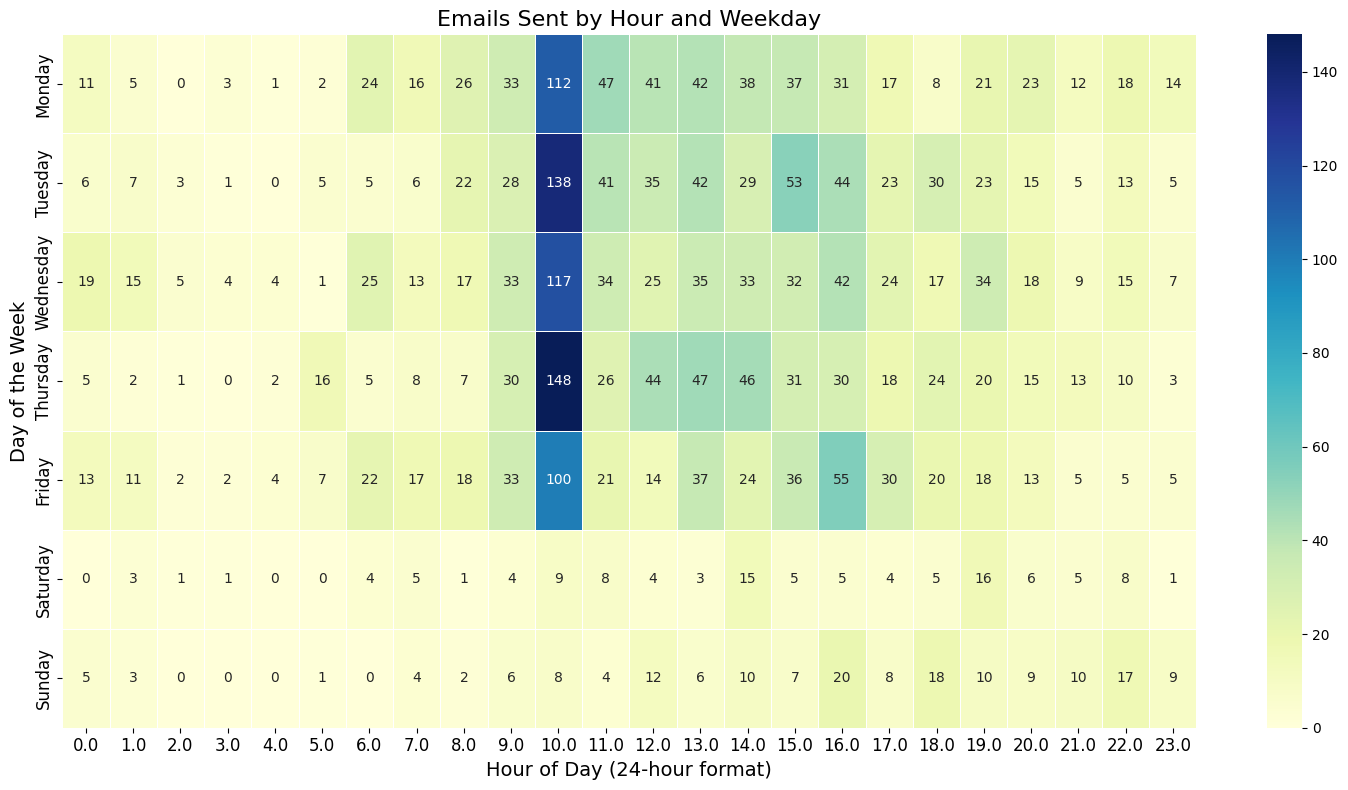

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the parsed email data
file_path = "..\Datasets\parsed_email_data.csv"
email_data = pd.read_csv(file_path)

# Ensure the 'Hour' and 'Weekday' columns are present
if {'Hour', 'Weekday'}.issubset(email_data.columns):
    # Map weekdays to ensure consistent order
    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    email_data['Weekday'] = pd.Categorical(email_data['Weekday'], categories=weekday_order, ordered=True)

    # Create a pivot table for heatmap data
    heatmap_data = email_data.pivot_table(
        index='Weekday', columns='Hour', aggfunc='size', fill_value=0
    )

    # Plot the heatmap
    plt.figure(figsize=(15, 8))
    sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
    plt.title('Emails Sent by Hour and Weekday', fontsize=16)
    plt.xlabel('Hour of Day (24-hour format)', fontsize=14)
    plt.ylabel('Day of the Week', fontsize=14)
    plt.xticks(rotation=0, fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()

    # Show the plot
    plt.show()
else:
    print("The 'Hour' or 'Weekday' column is missing. Ensure you have parsed time and weekday data correctly.")


<Figure size 1200x600 with 0 Axes>

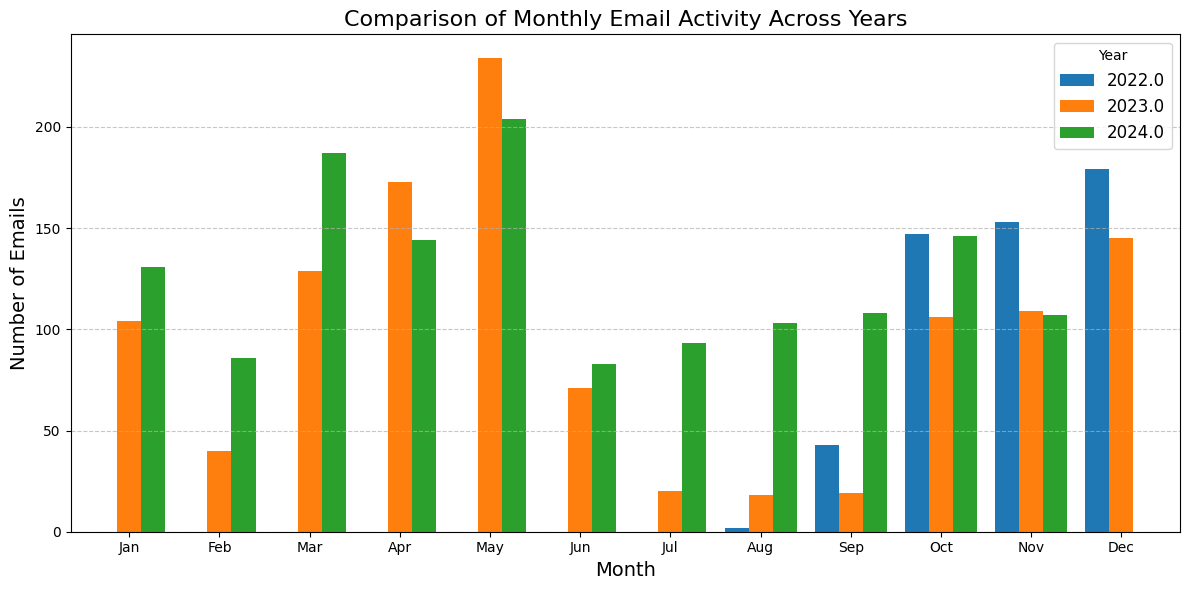

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the parsed email data
file_path = "../Datasets/parsed_email_data.csv"
email_data = pd.read_csv(file_path)

# Ensure 'Month' and 'Year' columns are present
if {'Month', 'Year'}.issubset(email_data.columns):
    # Map month names to numeric values if necessary
    month_mapping = {
        'January': 1, 'February': 2, 'March': 3, 'April': 4,
        'May': 5, 'June': 6, 'July': 7, 'August': 8,
        'September': 9, 'October': 10, 'November': 11, 'December': 12
    }
    if email_data['Month'].dtype == object:
        email_data['Month'] = email_data['Month'].map(month_mapping)
    
    # Group by Year and Month to count emails
    monthly_counts = email_data.groupby(['Year', 'Month']).size().reset_index(name='Email Count')
    
    # Pivot the data for easier plotting
    monthly_counts_pivot = monthly_counts.pivot(index='Month', columns='Year', values='Email Count').fillna(0)

    # Plot the comparison
    plt.figure(figsize=(12, 6))
    monthly_counts_pivot.plot(kind='bar', figsize=(12, 6), width=0.8)
    plt.title('Comparison of Monthly Email Activity Across Years', fontsize=16)
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Number of Emails', fontsize=14)
    plt.xticks(ticks=range(12), labels=[
        'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
    plt.legend(title='Year', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Show the plot
    plt.show()
else:
    print("Error: The 'Month' or 'Year' columns are missing.")


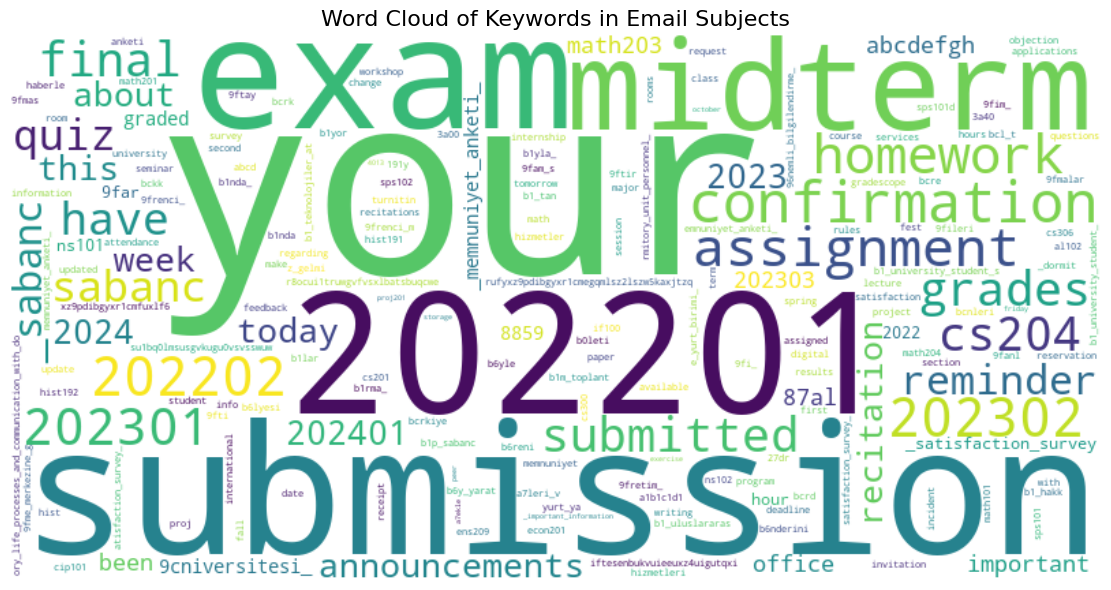

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
from wordcloud import WordCloud

# Load the parsed email data
file_path = "../Datasets/parsed_email_data.csv"
email_data = pd.read_csv(file_path)

# Ensure 'Subject' column is present
if 'Subject' in email_data.columns:
    # Combine all subject lines into a single string
    all_subjects = ' '.join(email_data['Subject'].dropna().astype(str))

    # Extract keywords using regular expressions (customize for your topics)
    # Example: Extract words longer than 3 characters
    keywords = re.findall(r'\b\w{4,}\b', all_subjects.lower())
    
    # Count keyword frequency
    keyword_counts = Counter(keywords)

    # Select the top 10 most common keywords
    top_keywords = keyword_counts.most_common(10)
    keywords_df = pd.DataFrame(top_keywords, columns=['Keyword', 'Frequency'])

    # Optional: Create a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(keyword_counts)
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Keywords in Email Subjects', fontsize=16)
    plt.tight_layout()
    plt.show()
else:
    print("Error: The 'Subject' column is missing.")


C:\Users\salem\AppData\Local\Temp\ipykernel_14300\402895282.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  course_emails['Course'] = course_emails['Subject'].apply(extract_course_name)


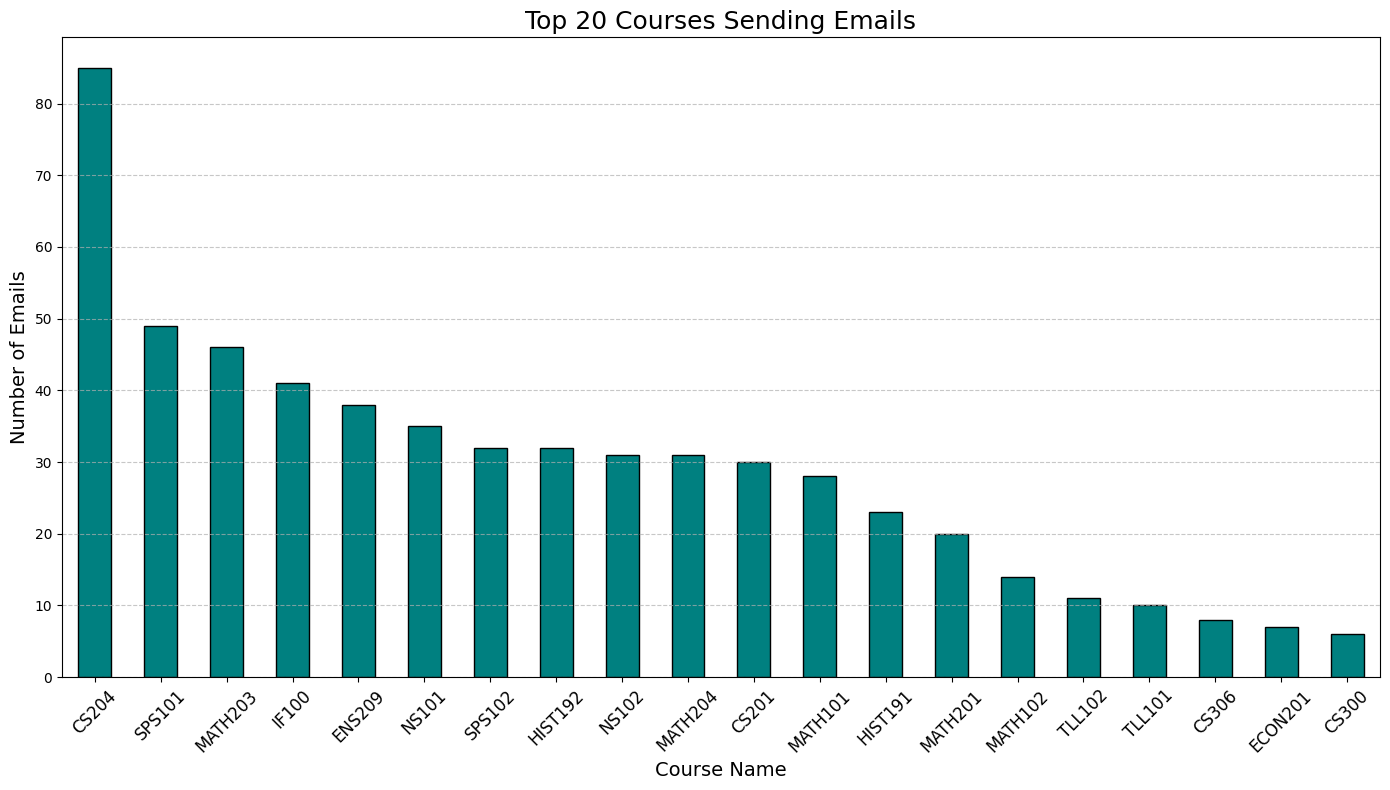

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load the parsed email data
file_path = "../Datasets/parsed_email_data.csv"
email_data = pd.read_csv(file_path)

# Ensure 'Subject' and 'Email' columns are present
if {'Subject', 'Email'}.issubset(email_data.columns):
    # Filter for emails from noreply.sucourse@sabanciuniv.edu
    course_emails = email_data[email_data['Email'] == 'noreply.sucourse@sabanciuniv.edu']

    # Extract valid course codes from the subject line
    def extract_course_name(subject):
        if isinstance(subject, str):
            # Match course codes like CS204, MATH204, IF100, etc.
            match = re.match(r'^[A-Z]{2,4}\d{3}', subject)
            if match:
                return match.group(0)
        return None

    course_emails['Course'] = course_emails['Subject'].apply(extract_course_name)

    # Filter out rows without valid course codes
    course_emails = course_emails.dropna(subset=['Course'])

    # Count the top 20 most frequent courses
    top_courses = course_emails['Course'].value_counts().head(20)

    # Plot a bar chart
    plt.figure(figsize=(14, 8))  # Increased figure size for better visualization
    top_courses.plot(kind='bar', color='teal', edgecolor='black')
    plt.title('Top 20 Courses Sending Emails', fontsize=18)
    plt.xlabel('Course Name', fontsize=14)
    plt.ylabel('Number of Emails', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("Error: The 'Subject' or 'Email' column is missing.")
